In [69]:
import pandas as pd
import numpy as np

In [70]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

# Отображение графика

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

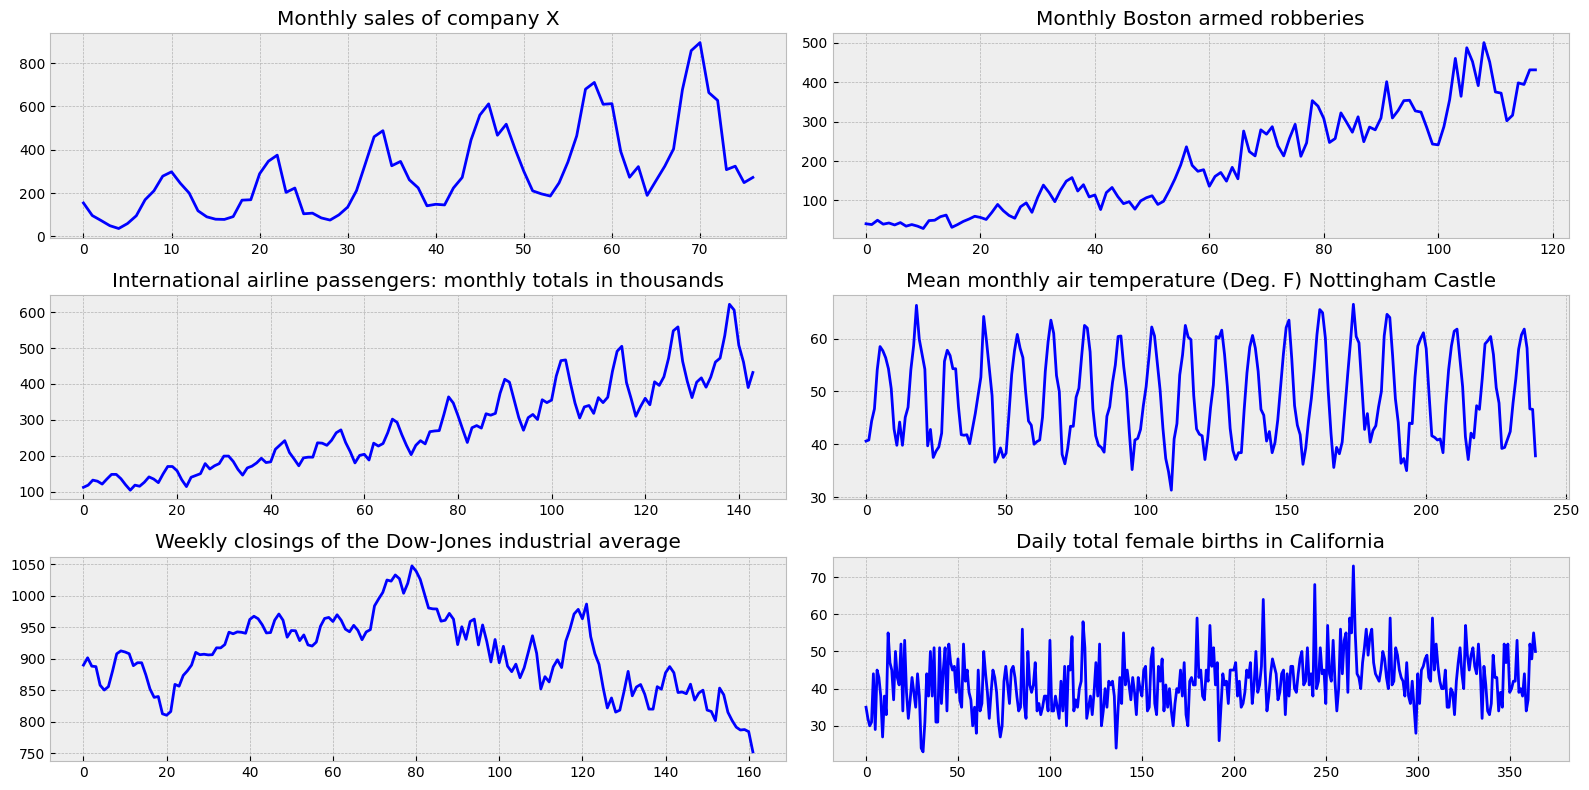

In [73]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

# Проанализируем ряды на стационарность

In [74]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

Test results for Monthly sales of company X:
ADF Statistic: 0.6547150829524446
p-value: 0.9888894205170052
Critical Values: {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}
Is the series stationary? No




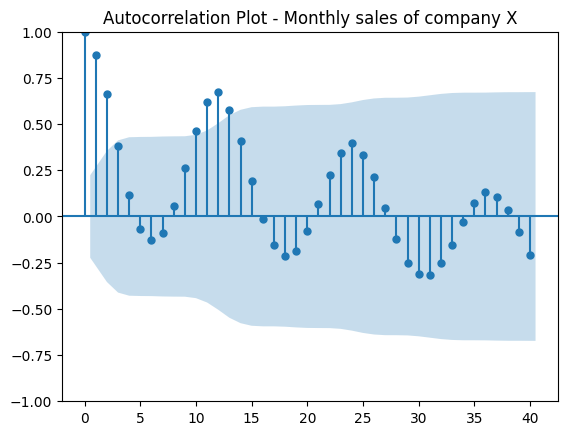

Test results for Monthly Boston armed robberies:
ADF Statistic: 1.001102140245781
p-value: 0.994277563805723
Critical Values: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
Is the series stationary? No




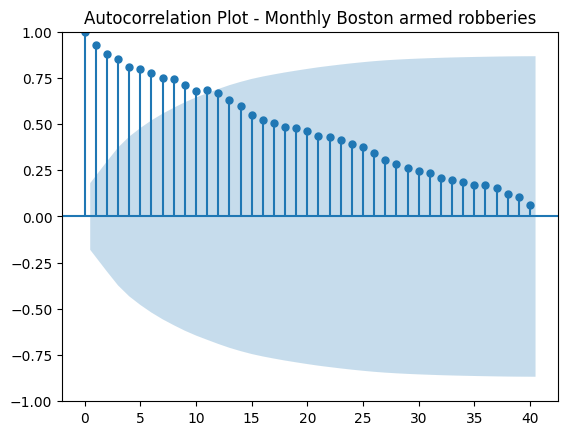

Test results for International airline passengers: monthly totals in thousands:
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Is the series stationary? No




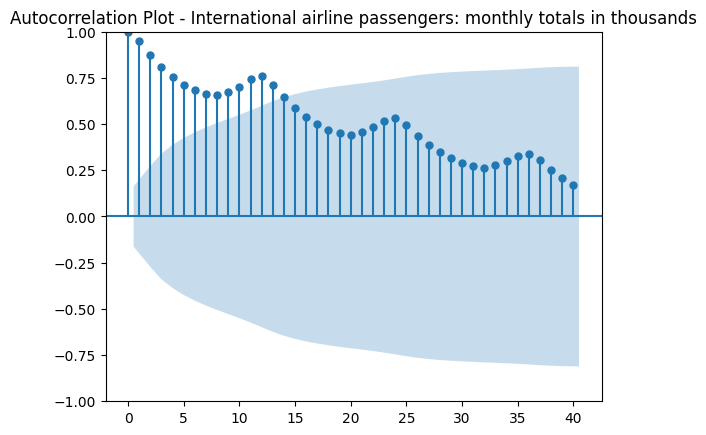

Test results for Mean monthly air temperature (Deg. F) Nottingham Castle:
ADF Statistic: -3.2554924030863366
p-value: 0.016989030222608604
Critical Values: {'1%': -3.4597521044060353, '5%': -2.874472927517147, '10%': -2.5736628197530864}
Is the series stationary? Yes




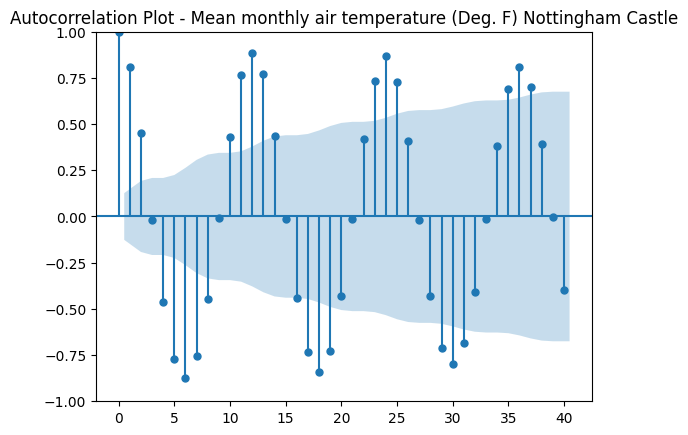

Test results for Weekly closings of the Dow-Jones industrial average:
ADF Statistic: -1.3146254984911683
p-value: 0.6224548515589733
Critical Values: {'1%': -3.471633386932248, '5%': -2.8796651107461972, '10%': -2.576433647235832}
Is the series stationary? No




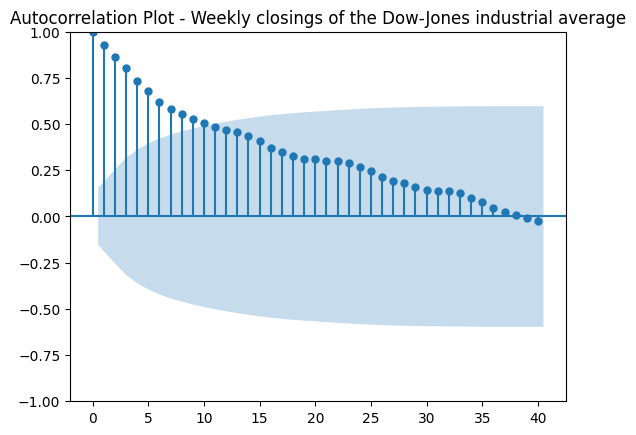

Test results for Daily total female births in California:
ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values: {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}
Is the series stationary? Yes




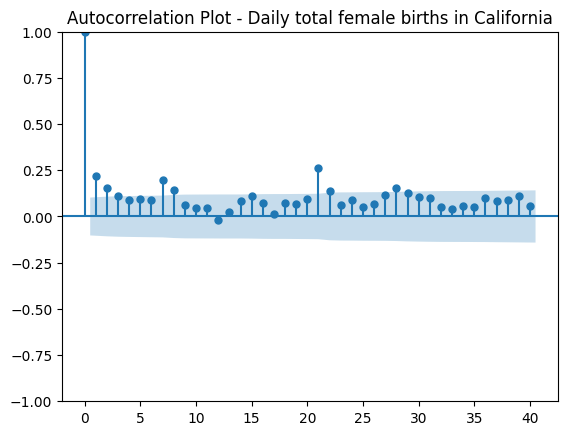

In [75]:
# Функция для проведения теста Дики-Фуллера
def adf_test(series, title):
    result = adfuller(series, autolag='AIC')
    print(f'Test results for {title}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    print('Is the series stationary? ' + ('Yes' if result[1] < 0.05 else 'No'))
    print('\n')

    # Рисуем коррелограмму
    plot_acf(series, lags=40, title=f'Autocorrelation Plot - {title}')
    plt.show()

# Проверка каждого ряда в словаре
for title, series in all_series.items():
    adf_test(series, title)

Убираем разброс дисперсии в выбранных по результатам коррелограмм рядов

In [76]:
from scipy.stats import boxcox

In [77]:
# Ряды, которые нужно исключить из преобразования Бокса-Кокса по результатам анализа коррелограмм - нет признака разброса дисперсии
exclude_series = [
    "Mean monthly air temperature (Deg. F) Nottingham Castle",
    "Weekly closings of the Dow-Jones industrial average",
    "Daily total female births in California"
]

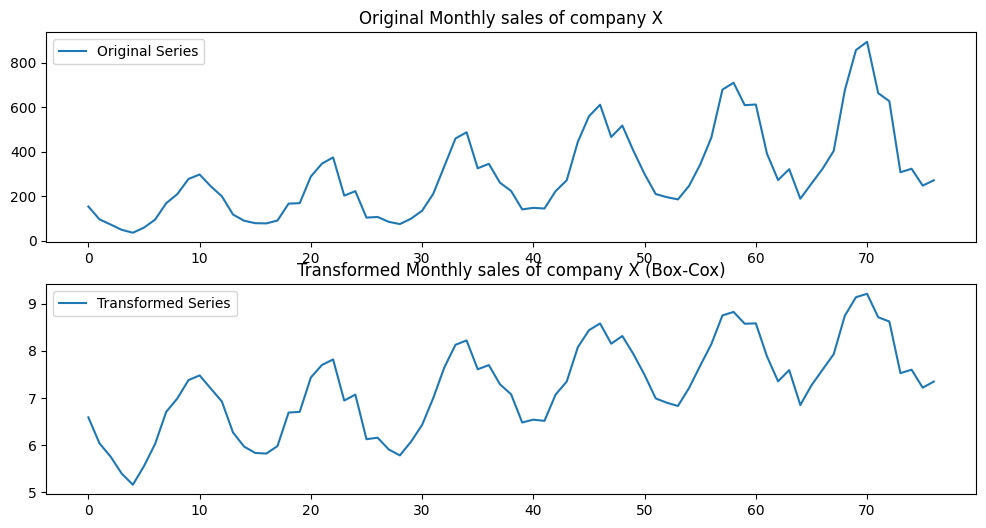

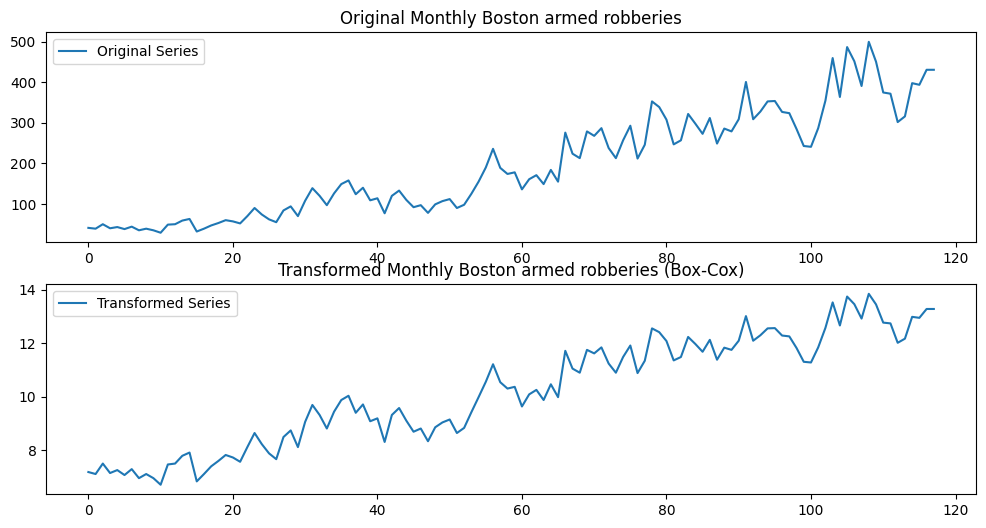

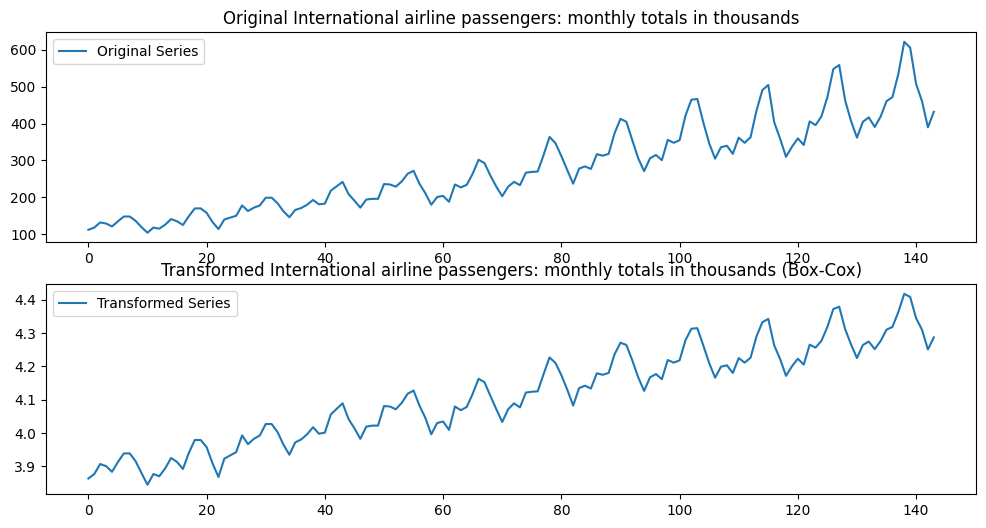

In [78]:
# Применение преобразования Бокса-Кокса к каждому ряду (исключая указанные)
transformed_series = {}
for series_name, series_data in all_series.items():
    if series_name in exclude_series:
        # Сохранение исходного ряда для исключенных рядов
        transformed_series[series_name] = {"OriginalData": series_data, "Excluded": True}
        continue

    # Исключение нулевых и отрицательных значений, так как преобразование Бокса-Кокса требует положительных чисел
    series_data_positive = series_data + np.abs(series_data.min()) + 1

    # Применение преобразования Бокса-Кокса
    transformed_data, lambda_value = boxcox(series_data_positive)

    # Сохранение преобразованного ряда и параметра lambda
    transformed_series[series_name] = {
        "TransformedData": transformed_data,
        "Lambda": lambda_value
    }

    # Визуализация исходного и преобразованного ряда для наглядности
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(series_data, label='Original Series')
    plt.title(f'Original {series_name}')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(transformed_data, label='Transformed Series')
    plt.title(f'Transformed {series_name} (Box-Cox)')
    plt.legend()

    plt.show()

Убираем тренд во всех рядах

In [79]:
import statsmodels.api as sm

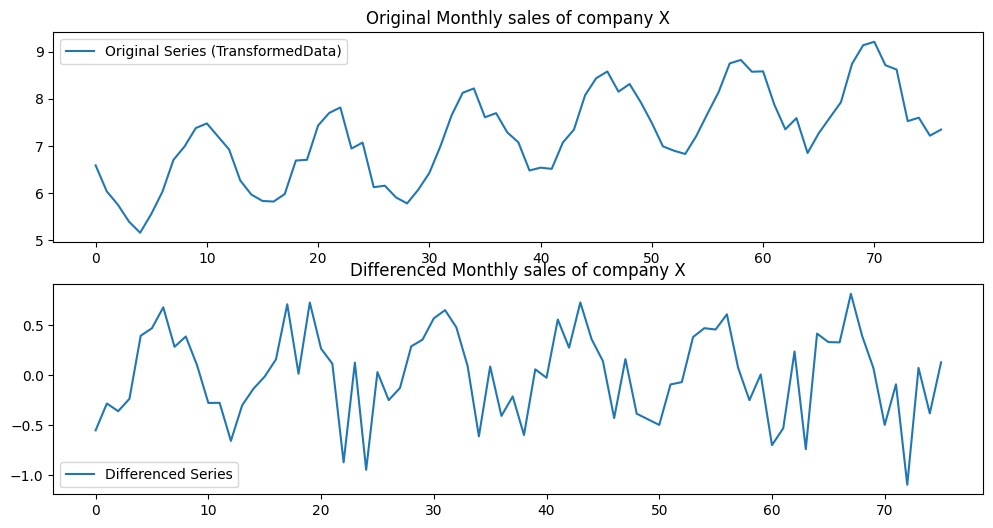

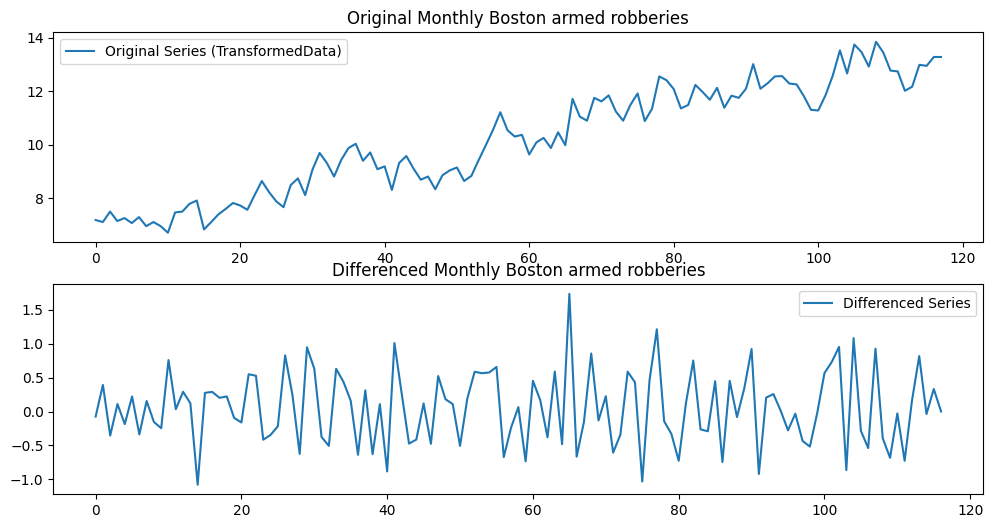

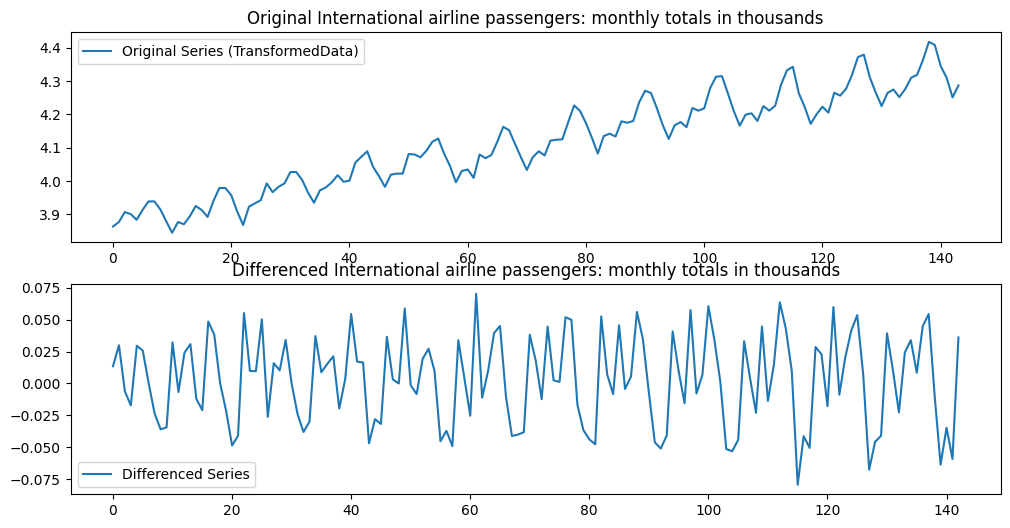

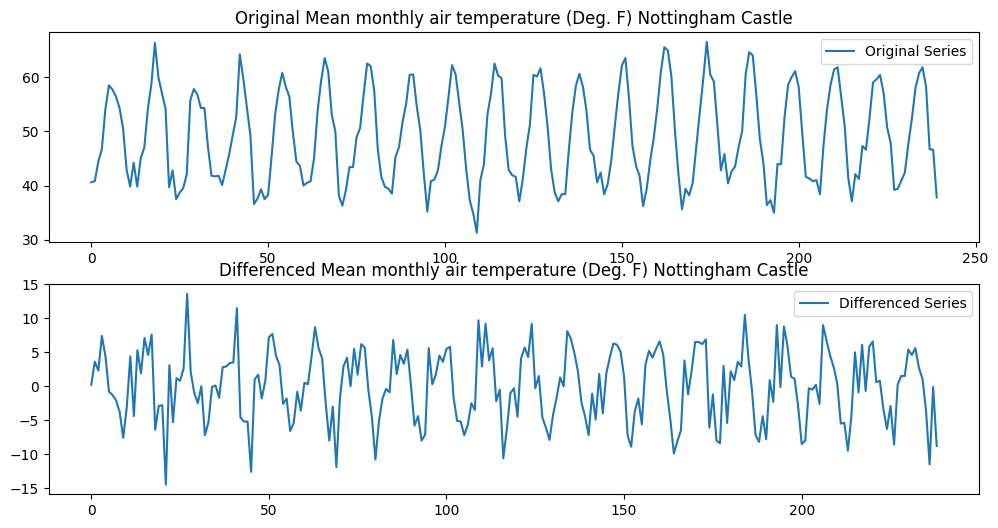

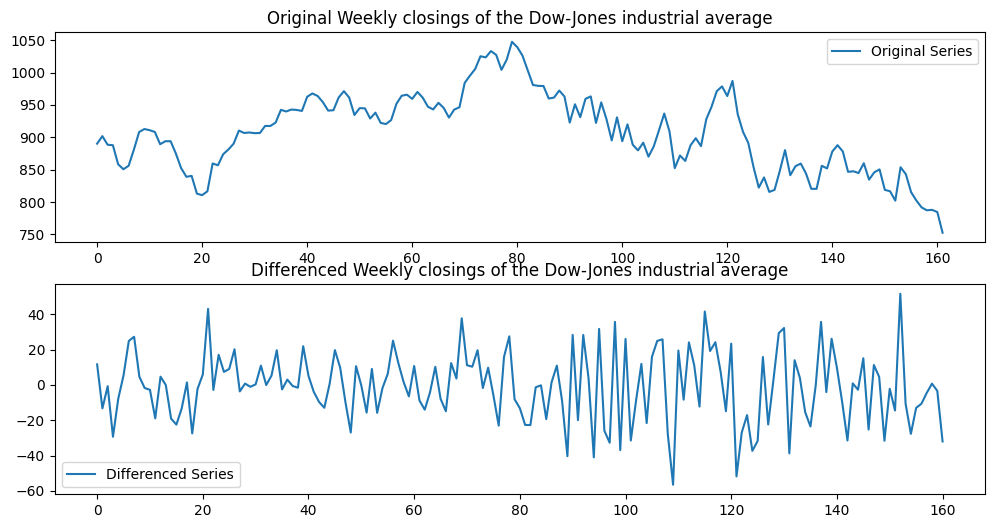

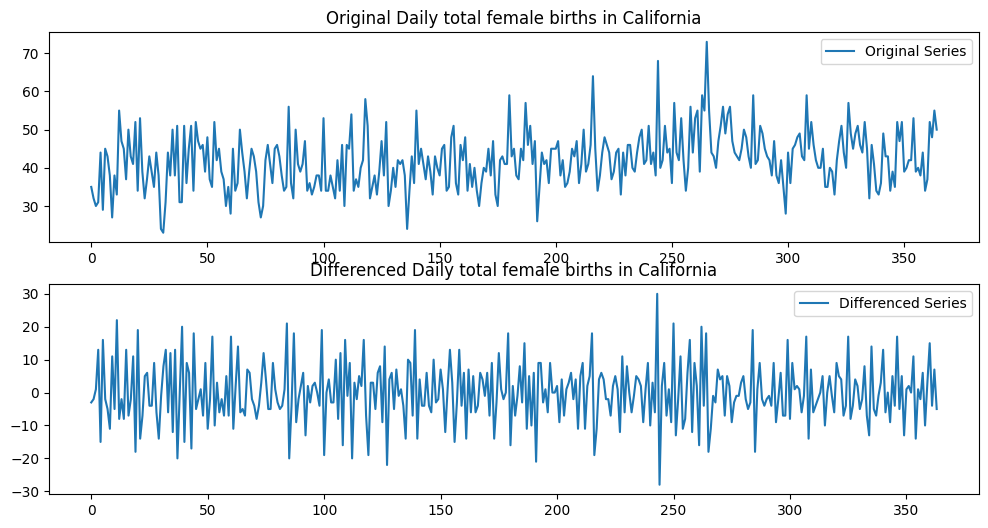

In [95]:
transformed_series1 = {}
for series_name, series_data in transformed_series.items():
    # Выбор данных для дифференциации (используйте 'TransformedData' или 'OriginalData', если 'TransformedData' отсутствует)
    data_to_difference = series_data.get('TransformedData', series_data.get('OriginalData', None))

    if data_to_difference is None:
        # Если и 'TransformedData', и 'OriginalData' отсутствуют, пропустить этот ряд
        continue

    # Применение дифференциации
    differenced_data = np.diff(data_to_difference)

    # Получение значения lambda с учетом возможного отсутствия ключа 'Lambda'
    lambda_value = series_data.get("Lambda", None)

    # Сохранение результата в новом словаре
    transformed_series1[series_name] = {
        "DifferencedData": differenced_data,
        "Lambda": lambda_value
    }

    # Визуализация исходного и дифференцированного ряда
    plt.figure(figsize=(12, 6))

    # Исходный ряд из 'OriginalData' (если есть)
    if 'OriginalData' in series_data:
        plt.subplot(2, 1, 1)
        plt.plot(series_data['OriginalData'], label='Original Series')
        plt.title(f'Original {series_name}')
        plt.legend()

    # Исходный ряд из 'TransformedData' (если есть)
    elif 'TransformedData' in series_data:
        plt.subplot(2, 1, 1)
        plt.plot(series_data['TransformedData'], label='Original Series (TransformedData)')
        plt.title(f'Original {series_name}')
        plt.legend()

    # Дифференцированный ряд
    plt.subplot(2, 1, 2)
    plt.plot(differenced_data, label='Differenced Series')
    plt.title(f'Differenced {series_name}')
    plt.legend()

    plt.show()

Повторная проверка на стационарность

Test results for Monthly sales of company X:
ADF Statistic: -3.2402972538418466
p-value: 0.0177674407711333
Critical Values: {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}
Is the series stationary? Yes




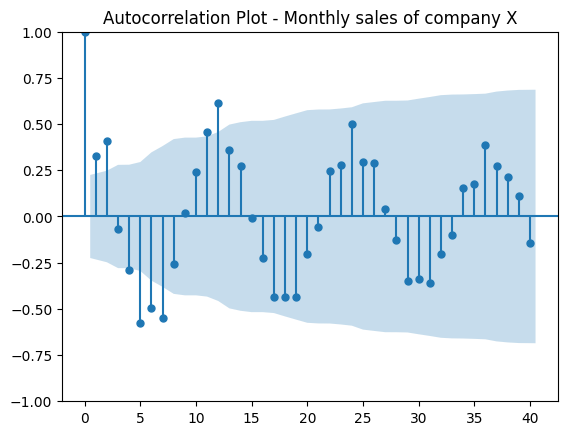

Test results for Monthly Boston armed robberies:
ADF Statistic: -5.96657054034905
p-value: 1.981292137103062e-07
Critical Values: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
Is the series stationary? Yes




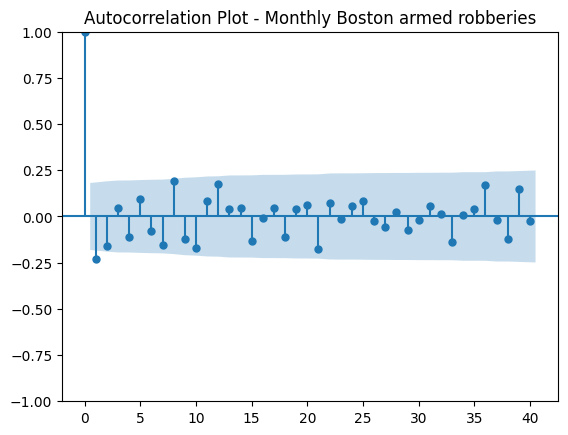

Test results for International airline passengers: monthly totals in thousands:
ADF Statistic: -2.9257307656720792
p-value: 0.04243663654075748
Critical Values: {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}
Is the series stationary? Yes




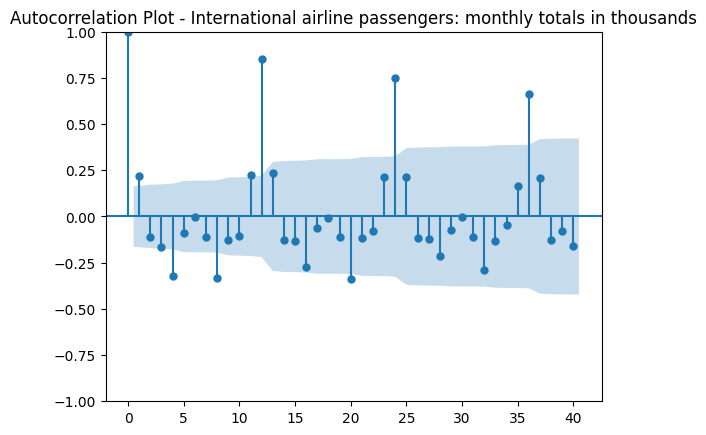

Test results for Mean monthly air temperature (Deg. F) Nottingham Castle:
ADF Statistic: -12.25927089189215
p-value: 9.157883248646586e-23
Critical Values: {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}
Is the series stationary? Yes




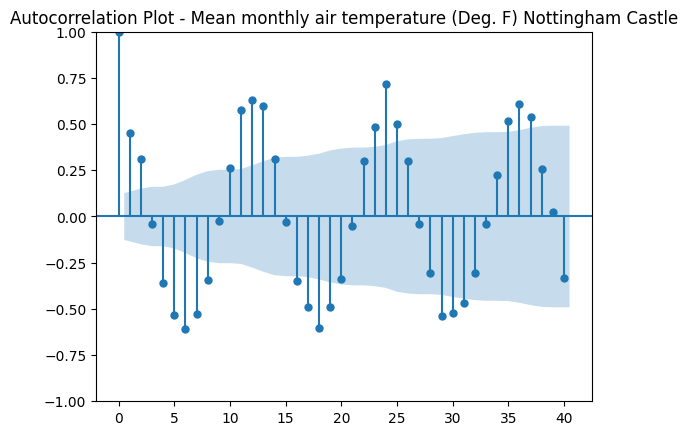

Test results for Weekly closings of the Dow-Jones industrial average:
ADF Statistic: -13.025207881234948
p-value: 2.4075864037417794e-24
Critical Values: {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}
Is the series stationary? Yes




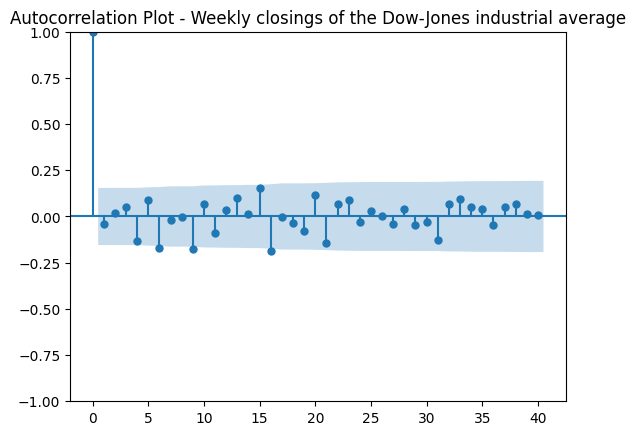

Test results for Daily total female births in California:
ADF Statistic: -12.62517863387136
p-value: 1.5472400091968453e-23
Critical Values: {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
Is the series stationary? Yes




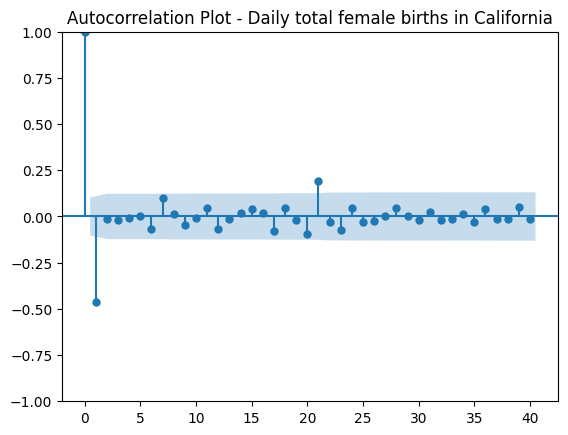

In [97]:
# Функция для выполнения теста Дики-Фуллера и вывода результатов


# Применение теста Дики-Фуллера для каждого ряда в transformed_series1
for series_name, series_data in transformed_series1.items():
    adf_test(series_data["DifferencedData"], series_name)

Удаляем влияние сезонности для выбранных рядов

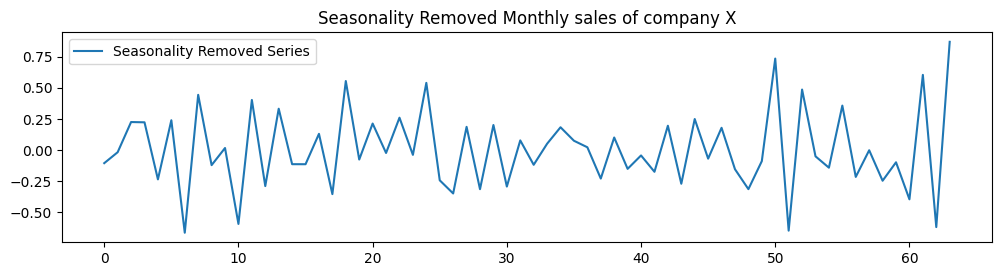

<Figure size 1200x600 with 0 Axes>

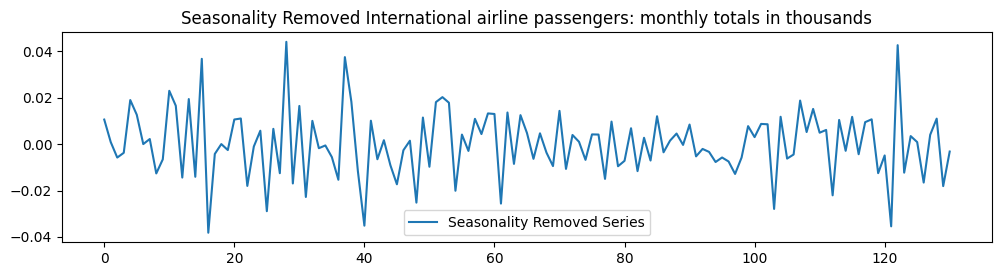

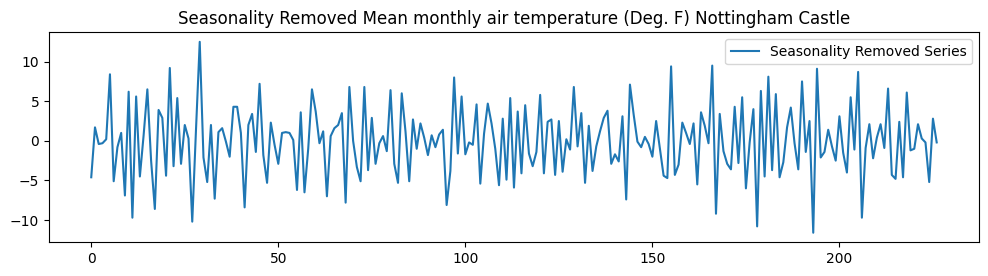

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [110]:
# Словарь для сохранения рядов после удаления сезонности
seasonality_removed_series = {}

# Ряды для применения удаления сезонности
series_to_remove_seasonality = ["Monthly sales of company X",
                                "Mean monthly air temperature (Deg. F) Nottingham Castle",
                                "International airline passengers: monthly totals in thousands"]

for series_name, series_data in transformed_series1.items():
    # Проверка, нужно ли применять удаление сезонности к текущему ряду
    if series_name in series_to_remove_seasonality:
        # Применение удаления сезонности методом вычитания
        seasonality_removed_data = np.array(series_data.get("DifferencedData", [])[12:] - series_data.get("DifferencedData", [])[:-12])
        series_data["SeasonalityRemovedData"] = seasonality_removed_data

        # Сохранение результата в новом словаре
        seasonality_removed_series[series_name] = series_data
    else:
        # Сохранение ряда без изменений
        seasonality_removed_series[series_name] = series_data

# Визуализация исходных и рядов после удаления сезонности
for series_name, series_data in seasonality_removed_series.items():
    plt.figure(figsize=(12, 6))

    # Исходный ряд
    original_data = series_data.get('OriginalData', []) if series_name in series_to_remove_seasonality else series_data.get('TransformedData', [])
    if original_data:
        plt.subplot(2, 1, 1)
        plt.plot(original_data, label='Original Series')
        plt.title(f'Original {series_name}')
        plt.legend()

    # Ряд после удаления сезонности
    seasonality_removed_data = series_data.get('SeasonalityRemovedData', None)
    if seasonality_removed_data is not None and len(seasonality_removed_data) > 0:
        plt.subplot(2, 1, 2)
        plt.plot(seasonality_removed_data, label='Seasonality Removed Series')
        plt.title(f'Seasonality Removed {series_name}')
        plt.legend()

    plt.show()


Test results for Monthly sales of company X:
ADF Statistic: -3.2402972538418466
p-value: 0.0177674407711333
Critical Values: {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}
Is the series stationary? Yes




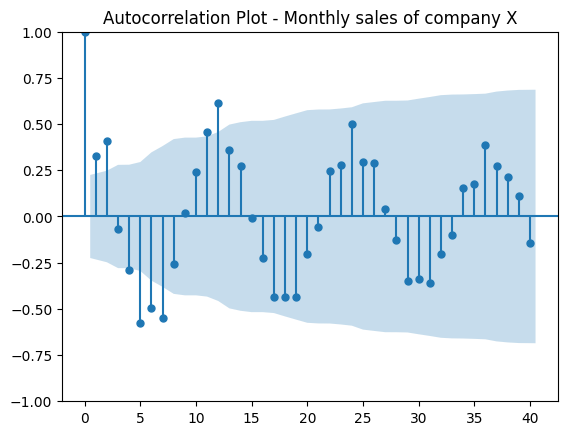

Test results for Monthly Boston armed robberies:
ADF Statistic: -5.96657054034905
p-value: 1.981292137103062e-07
Critical Values: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
Is the series stationary? Yes




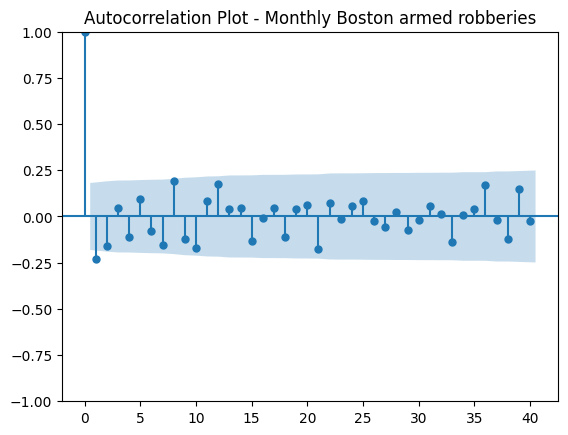

Test results for International airline passengers: monthly totals in thousands:
ADF Statistic: -2.9257307656720792
p-value: 0.04243663654075748
Critical Values: {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}
Is the series stationary? Yes




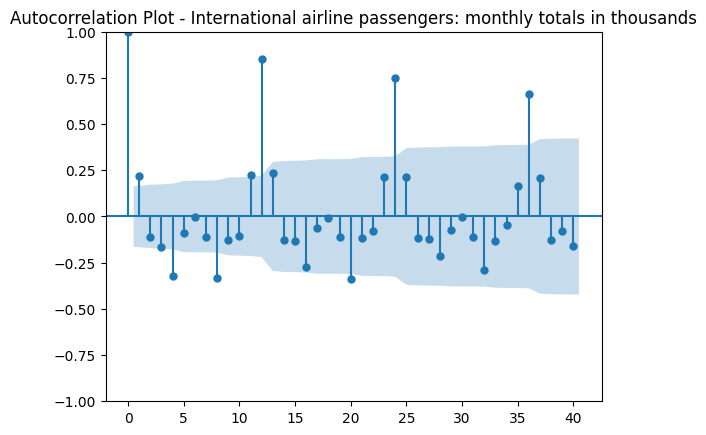

Test results for Mean monthly air temperature (Deg. F) Nottingham Castle:
ADF Statistic: -12.25927089189215
p-value: 9.157883248646586e-23
Critical Values: {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}
Is the series stationary? Yes




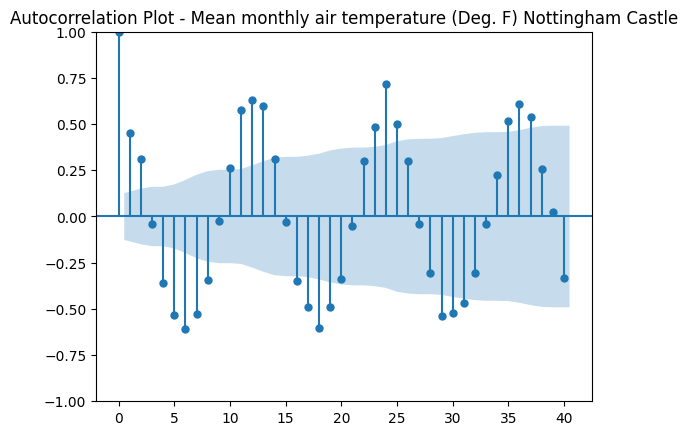

Test results for Weekly closings of the Dow-Jones industrial average:
ADF Statistic: -13.025207881234948
p-value: 2.4075864037417794e-24
Critical Values: {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}
Is the series stationary? Yes




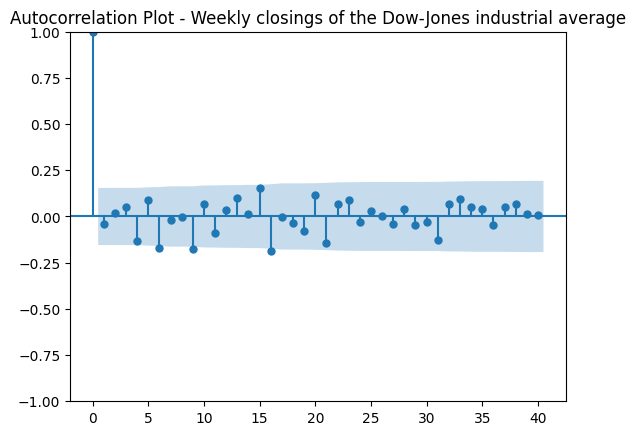

Test results for Daily total female births in California:
ADF Statistic: -12.62517863387136
p-value: 1.5472400091968453e-23
Critical Values: {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
Is the series stationary? Yes




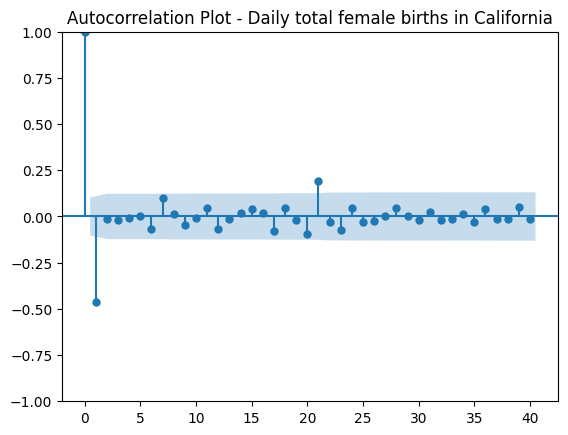

In [111]:
for series_name, series_data in seasonality_removed_series.items():
    adf_test(series_data["DifferencedData"], series_name)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности рядов!